In [36]:
import os
from xml.etree import ElementTree as ET
import pandas as pd
import numpy as np
import re
import shutil
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import matplotlib.patches as patches
import matplotlib

In [4]:
def xml_extract(path):
    tree = ET.parse(open(path))
    root = tree.getroot()

    cls_list = []

    no_obj_xml = False

    if not root.find("object"):
        no_obj_xml = True
        pass
    else:
        for obj in root.iter("object"):
            if obj.find("name").text not in cls_list:
                cls_list.append(obj.find("name").text)
            else:
                pass
    
    return cls_list, no_obj_xml

In [26]:
path = r"D:\New folder\backup_data\cleaned_data"

xml_name = re.compile(r"\.xml$")
no_obj_list = []
cls = []
for f in os.listdir(path):
    file = os.path.join(path, f)

    if len(os.listdir(file)) != 0:
        for data in os.listdir(file):
            if xml_name.search(data):
                cls_list, no_obj = xml_extract(os.path.join(file, data))

                if no_obj == True:
                    no_obj_list.append(os.path.join(f, data))
                else:
                    pass
                
                for i in cls_list:
                    if i not in cls:
                        cls.append(i)
                    else:
                        pass
            else:
                pass
print(f"The total number of classes: {len(cls)}\n{cls}")
print(f"\nThe number of No Object: {len(no_obj_list)}")

print(f"\nThe name of No Object files: ")
for files in no_obj_list:
    print(files)

The total number of classes: 23
['第一掌骨', '第三指骨中节', '第三指骨远节', '第四指骨中节', '第四指骨远节', '第二指骨近节', '第二指骨中节', '第二指骨远节', '第三指骨近节', '第二掌骨', '第三掌骨', '第四指骨近节', '第四掌骨', '第一指骨远节', '第一指骨近节', '第五掌骨', '桡骨', '尺骨', '第五指骨近节', '第五指骨中节', '第五指骨远节', '腕骨', '第3掌骨']

The number of No Object: 12

The name of No Object files: 
caoyuncheng-126\IMG-0002-00004.xml
dujiayi-42\IMG-0002-00002.xml
dujiayi-42\IMG-0002-00011.xml
heyubo-123\IMG-0002-00002.xml
huazhiyun-79\IMG-0002-00009.xml
jiahaolin-77\IMG-0002-00004.xml
liyichen-56\IMG-0002-00010.xml
pengjiahao-168\IMG-0001-00008.xml
qianpengyi-157\IMG-0002-00004.xml
tumoyan-48\IMG-0002-00004.xml
zhangzihao-78\IMG-0002-00003.xml
zhangzihao-78\IMG-0002-00005.xml


In [27]:
cls

['第一掌骨',
 '第三指骨中节',
 '第三指骨远节',
 '第四指骨中节',
 '第四指骨远节',
 '第二指骨近节',
 '第二指骨中节',
 '第二指骨远节',
 '第三指骨近节',
 '第二掌骨',
 '第三掌骨',
 '第四指骨近节',
 '第四掌骨',
 '第一指骨远节',
 '第一指骨近节',
 '第五掌骨',
 '桡骨',
 '尺骨',
 '第五指骨近节',
 '第五指骨中节',
 '第五指骨远节',
 '腕骨',
 '第3掌骨']

In [13]:
def folder_check(path):
    if not os.path.exists(path):
        os.makedirs(path)
    return path

def cut_paste(src, dest):
    shutil.move(src, dest)

def data_preprocessing(path):
    for patient_file in os.listdir(path):
        patient_path = os.path.join(path, patient_file)

        image_folder = folder_check(os.path.join(patient_path, "images"))
        xml_folder = folder_check(os.path.join(patient_path, "xmls"))
        
        for file in os.listdir(patient_path):
            if file.endswith(".bmp"):
                src = os.path.join(patient_path, file)
                cut_paste(src, image_folder)
                curr_name = os.path.join(image_folder, file)
                new_name = os.path.join(image_folder, patient_file + "_" + file)
                os.rename(curr_name, new_name)
            elif file.endswith(".xml"):
                src = os.path.join(patient_path, file)
                cut_paste(src, xml_folder)
                curr_name = os.path.join(xml_folder, file)
                new_name = os.path.join(xml_folder, patient_file + "_" + file)
                os.rename(curr_name, new_name)

In [14]:
path = r"D:\New folder\selected_data\cleaned_data"
data_preprocessing(path)

In [15]:
def no_xml_remove(path):

    numb_of_nonXML = 0
    for file in os.listdir(path):
        patient_file = os.path.join(path, file)
        xml_file = os.path.join(patient_file, "xmls")
        img_file = os.path.join(patient_file, "images")

        for xml in os.listdir(xml_file):
            xml_path = os.path.join(xml_file, xml)
            tree = ET.parse(open(xml_path))
            root = tree.getroot()
            if not root.find("object"):
                if os.path.exists(xml_path):
                    os.remove(xml_path)
                    os.remove(os.path.join(img_file, xml.split(".")[0]+".bmp"))

                    numb_of_nonXML += 1
    print(f"{numb_of_nonXML} Number of nonXML are removed.")

In [16]:
path = r"D:\New folder\selected_data\cleaned_data"
no_xml_remove(path)

12 Number of nonXML are removed.


In [18]:
def file_merge(path):
    processed_path = r"D:\New folder\selected_data\processed_data"
    img_file = os.path.join(processed_path, "images")
    xml_file = os.path.join(processed_path, "xmls")
    if not os.path.exists(xml_file):
        os.makedirs(xml_file)
    if not os.path.exists(img_file):
        os.makedirs(img_file)
    for file in os.listdir(path):
        patient_file = os.path.join(path, file)
        for data in os.listdir(patient_file):
            if data == "images":
                img_folder = os.path.join(patient_file, data)
                for img in os.listdir(img_folder):
                    src = os.path.join(img_folder, img)
                    shutil.copy(src, img_file)
            elif data == "xmls":
                xml_folder = os.path.join(patient_file, data)
                for xml in os.listdir(xml_folder):
                    src = os.path.join(xml_folder, xml)
                    shutil.copy(src, xml_file)

In [19]:
path = r"D:\New folder\selected_data\cleaned_data"
file_merge(path)

In [22]:
for file in os.listdir(r"D:\New folder\selected_data\processed_data\images"):
    if file.startswith("wangjuanjie-320 SPECIAL"):
        os.remove(os.path.join(r"D:\New folder\selected_data\processed_data\images", file))
for file in os.listdir(r"D:\New folder\selected_data\processed_data\images"):
    if file.startswith("zhonglongping-280 SPECIAL"):
        os.remove(os.path.join(r"D:\New folder\selected_data\processed_data\images", file))

In [24]:
img_path = r"D:\New folder\selected_data\processed_data\images"
xml_path = r"D:\New folder\selected_data\processed_data\xmls"
for img in os.listdir(img_path):
    if img.split(".")[0]+".xml" not in os.listdir(xml_path):
        os.remove(os.path.join(img_path, img))
        print(img)

chenyongli-507_IMG-0017-00001.bmp
chenyongli-507_IMG-0017-00002.bmp
chenyongli-507_IMG-0017-00003.bmp
chenyongli-507_IMG-0017-00004.bmp
huyaming-526_IMG-0056-00004.bmp


In [54]:
def xml_modify(path):
    for xml in os.listdir(path):
        xml_path = os.path.join(path, xml)
        tree = ET.parse(open(xml_path))
        root = tree.getroot()
        root.find("filename").text = xml
        tree.write(xml_path)
p = r"D:\New folder\selected_data\processed_data\xmls"
xml_modify(p)

**python ./convert2Yolo-master/example.py --datasets VOC --img_path ./processed_data/images --label ./processed_data/xmls --convert_output_path ./processed_data/labels --img_type '.bmp' --manifest_path ./ --cls_list_file ./voc.names**

In [57]:
python ./yolov7/train.py --workers 8 --device 0 --batch-size 64 --data ./yolov7/data/BONE.yaml --img 320 320 --cfg ./yolov7/cfg/training/yolov7.yaml --weights '' --name yolov7BONE --hyp data/hyp.scratch.custom.yaml --epochs 100 --adam --exist-ok

'第一掌骨'

# Image Reshaping and bbox updating

In [41]:
def resize_image(image, target_size=(640, 640)):

    """
    Resize an image and its bounding box to a target size.
    :param image_path: Path to the image file.
    :param bbox: The bounding box in the format [xmin, ymin, xmax, ymax].
    :param target_size: A tuple (width, height) for the target image size.
    """

    original_size = image.size
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))
    delta_w = target_size[0] - new_size[0]
    delta_h = target_size[1] - new_size[1]
    padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))

    resized_image = image.resize(new_size, Image.ANTIALIAS)
    resized_image = ImageOps.expand(resized_image, padding)
    return resized_image, ratio, padding

def resize_bbox(bbox, ratio, padding):
    xmin, ymin, xmax, ymax = bbox
    new_bbox = [xmin * ratio + padding[0],
                ymin * ratio + padding[1],
                xmax * ratio + padding[0],
                ymax * ratio + padding[1]]
    return new_bbox

def update_bbox_xml(root, ratio, padding):
    for size in root.findall('size'):
        size.find('width').text = str(640)
        size.find('height').text = str(640)

    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        new_bbox = resize_bbox([xmin, ymin, xmax, ymax], ratio, padding)
        bbox.find('xmin').text = str(int(new_bbox[0]))
        bbox.find('ymin').text = str(int(new_bbox[1]))
        bbox.find('xmax').text = str(int(new_bbox[2]))
        bbox.find('ymax').text = str(int(new_bbox[3]))

def process_images_and_xml(image_folder, xml_folder, img_output_folder, xml_output_folder):
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.png', '.jpg', '.jpeg', '.bmp')):  # Add other formats if needed
            image_path = os.path.join(image_folder, image_name)
            xml_path = os.path.join(xml_folder, os.path.splitext(image_name)[0] + '.xml')

            if os.path.exists(xml_path):
                # Load image and XML
                image = Image.open(image_path)
                tree = ET.parse(xml_path)
                root = tree.getroot()

                # Resize image
                resized_image, ratio, padding = resize_image(image)

                # Update all bounding boxes in the XML
                update_bbox_xml(root, ratio, padding)

                # Save the resized image and updated XML
                resized_image.save(os.path.join(img_output_folder, image_name))
                tree.write(os.path.join(xml_output_folder, os.path.splitext(image_name)[0] + '.xml'))

**Reshaping and undating the bbox of Training Data**

In [42]:
image_folder = r'D:\New folder\selected_data\processed_data\train\images'
xml_folder = r'D:\New folder\selected_data\processed_data\train\xmls'
img_output_folder = r'D:\New folder\selected_data\new_processed_data\train\images'
xml_output_folder = r'D:\New folder\selected_data\new_processed_data\train\xmls'
process_images_and_xml(image_folder, xml_folder, img_output_folder, xml_output_folder)

C:\Users\ky\AppData\Local\Temp\ipykernel_15080\3513683936.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


**Reshaping and undating the bbox of Validating Data**

In [43]:
image_folder = r'D:\New folder\selected_data\processed_data\valid\images'
xml_folder = r'D:\New folder\selected_data\processed_data\valid\xmls'
img_output_folder = r'D:\New folder\selected_data\new_processed_data\valid\images'
xml_output_folder = r'D:\New folder\selected_data\new_processed_data\valid\xmls'
process_images_and_xml(image_folder, xml_folder, img_output_folder, xml_output_folder)

C:\Users\ky\AppData\Local\Temp\ipykernel_15080\3513683936.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  resized_image = image.resize(new_size, Image.ANTIALIAS)


**Plotting the Images and comparing**

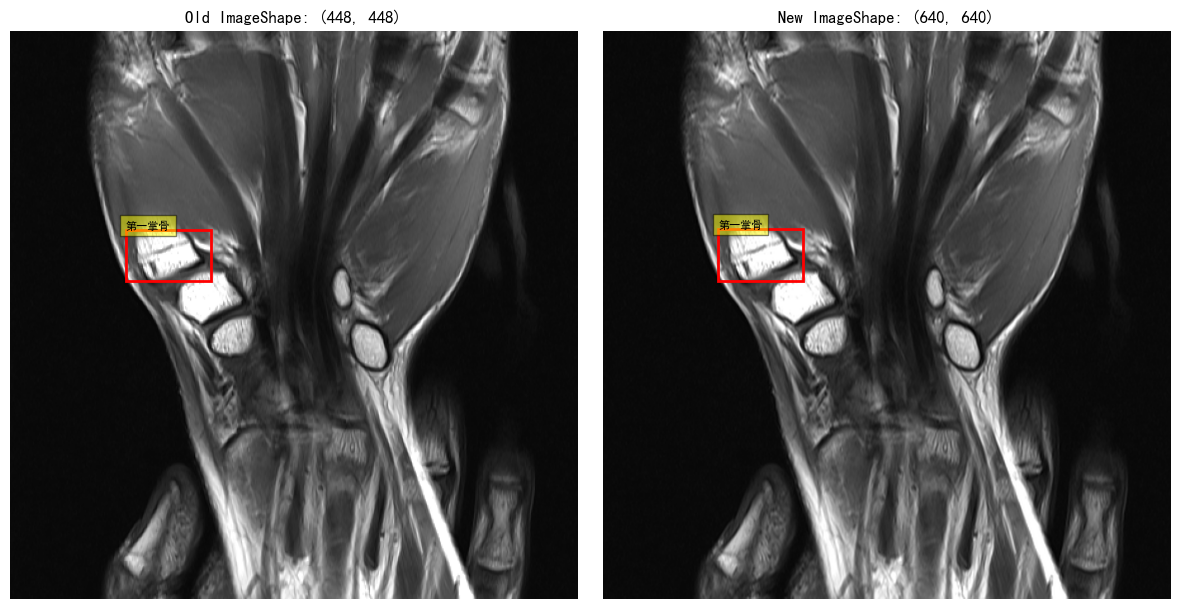

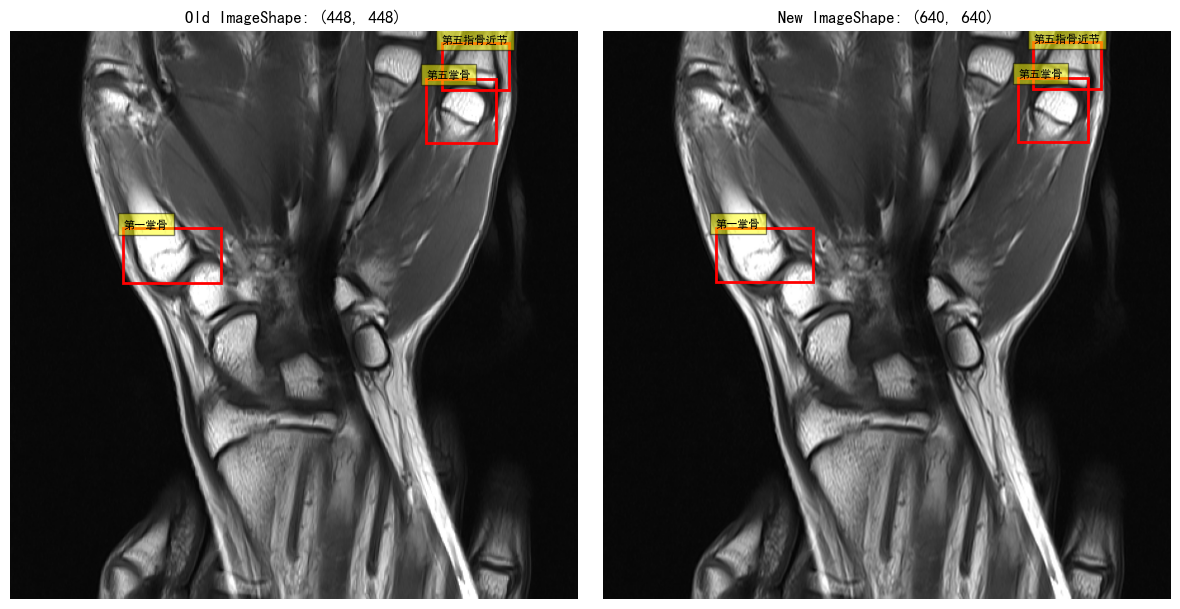

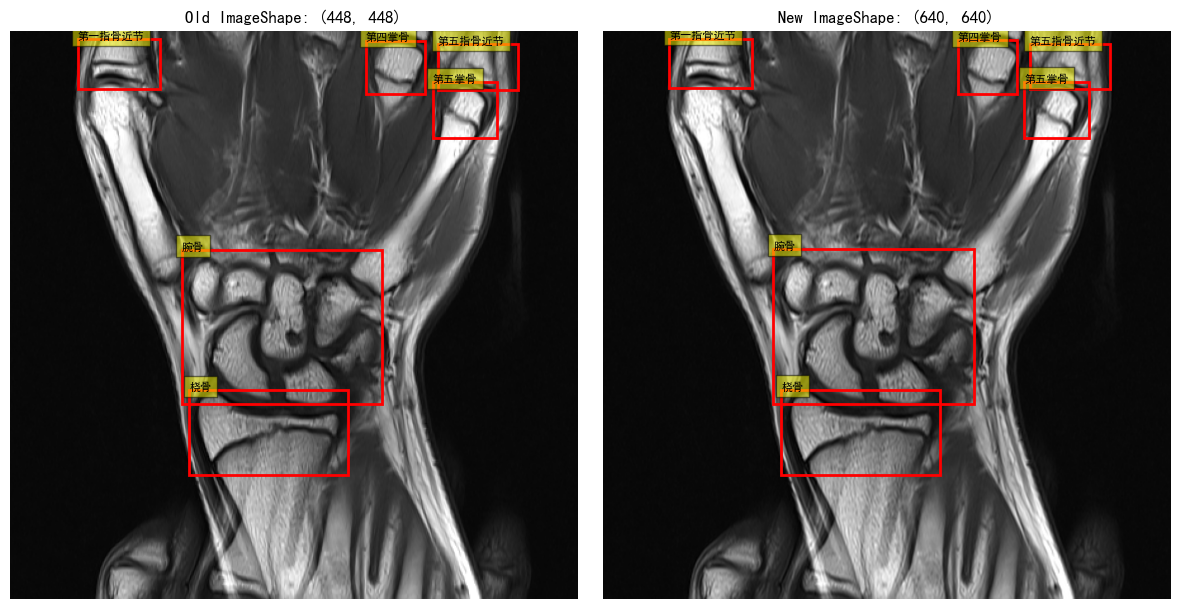

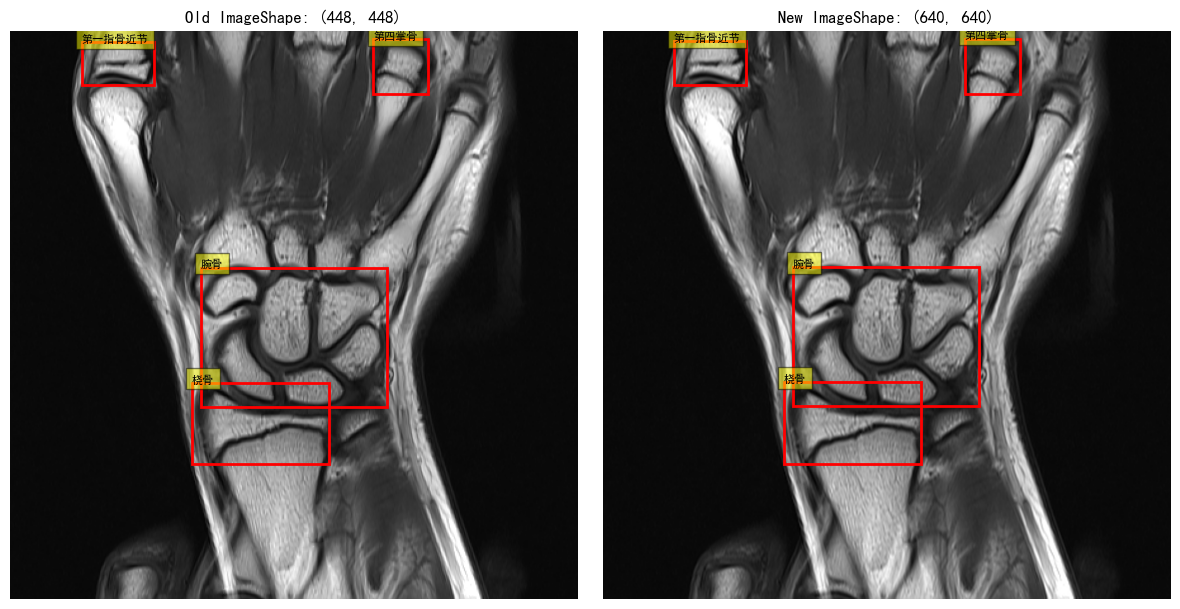

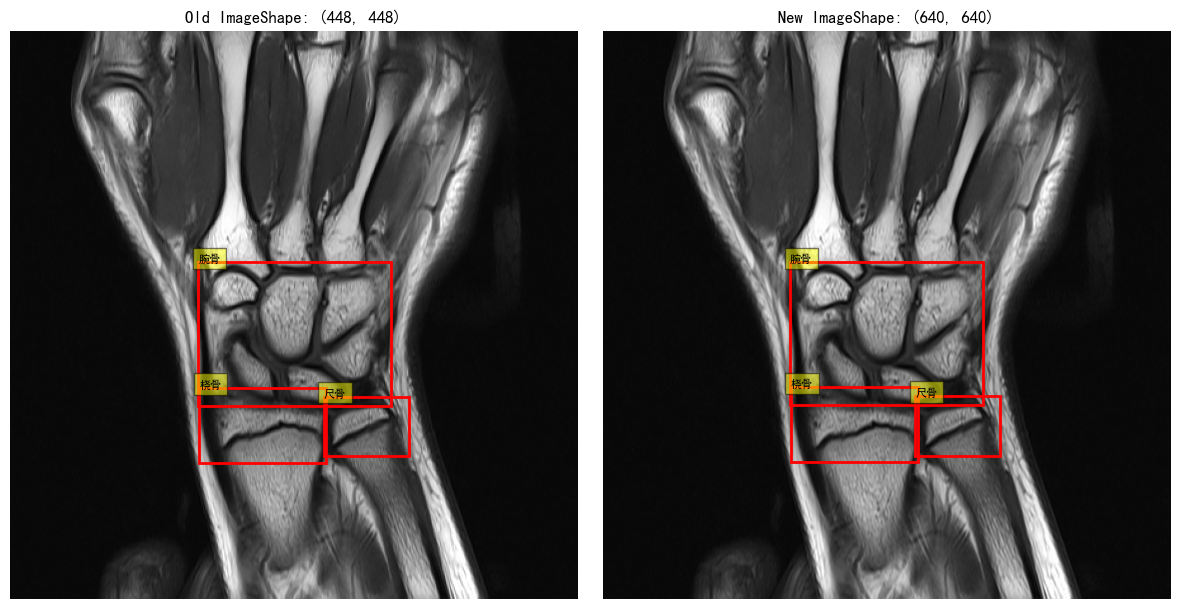

In [50]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

def get_bboxes_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    bboxes = []
    classes = []
    for member in root.findall('object'):
        cls_name = member.find('name').text
        xmin = int(member.find('bndbox/xmin').text)
        ymin = int(member.find('bndbox/ymin').text)
        xmax = int(member.find('bndbox/xmax').text)
        ymax = int(member.find('bndbox/ymax').text)
        bboxes.append([xmin, ymin, xmax, ymax])
        classes.append(cls_name)
    return bboxes, classes

def plot_images_with_bboxes(image_paths, bbox_lists, class_lists, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for ax, image_path, bboxes, classes, title in zip(axes, image_paths, bbox_lists, class_lists, titles):
        image = Image.open(image_path)
        ax.imshow(image)
        ax.set_title(title+f"Shape: {image.size}")
        for bbox, class_name in zip(bboxes, classes):
            xmin, ymin, xmax, ymax = bbox
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin, class_name, bbox=dict(facecolor='yellow', alpha=0.5), clip_on = True, fontsize=8)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Paths to old and new folders
old_image_folder = r"D:\New folder\selected_data\processed_data\train\images"
old_xml_folder = r"D:\New folder\selected_data\processed_data\train\xmls"
new_image_folder = r"D:\New folder\selected_data\new_processed_data\train\images"
new_xml_folder = r"D:\New folder\selected_data\new_processed_data\train\xmls"

# Get list of image files
old_image_files = sorted(os.listdir(old_image_folder))[:5]
new_image_files = sorted(os.listdir(new_image_folder))[:5]

# Plot first five pairs of images
for old_image_file, new_image_file in zip(old_image_files, new_image_files):
    old_image_path = os.path.join(old_image_folder, old_image_file)
    new_image_path = os.path.join(new_image_folder, new_image_file)
    old_xml_path = os.path.join(old_xml_folder, os.path.splitext(old_image_file)[0] + '.xml')
    new_xml_path = os.path.join(new_xml_folder, os.path.splitext(new_image_file)[0] + '.xml')

    if os.path.exists(old_image_path) and os.path.exists(new_image_path) and \
       os.path.exists(old_xml_path) and os.path.exists(new_xml_path):
        old_bboxes, old_classes = get_bboxes_from_xml(old_xml_path)
        new_bboxes, new_classes = get_bboxes_from_xml(new_xml_path)
        plot_images_with_bboxes(
            [old_image_path, new_image_path],
            [old_bboxes, new_bboxes],
            [old_classes, new_classes],
            ['Old Image', 'New Image']
        )


In [24]:
!python ./yolov7/detect_modified.py --weights ./best.pt --img-size 640 --source ./xuyifei-165_IMG-0001-00003.bmp --save-txt --save-conf --device 0

Namespace(weights=['./best.pt'], source='./xuyifei-165_IMG-0001-00003.bmp', img_size=640, conf_thres=0.25, iou_thres=0.45, device='0', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

The reult is: (tensor(1., device='cuda:0'), 0.512499988079071, 0.18671874701976776, 0.10312499850988388, 0.0703125, tensor(0.70020, device='cuda:0'))
The reult is: (tensor(11., device='cuda:0'), 0.598437488079071, 0.4296875, 0.10312499850988388, 0.07187499850988388, tensor(0.82471, device='cuda:0'))
The reult is: (tensor(3., device='cuda:0'), 0.617968738079071, 0.23046875, 0.10468749701976776, 0.07343749701976776, tensor(0.83350, device='cuda:0'))
1 第三指骨中节, 1 第四指骨中节, 1 第四指骨近节

YOLOR  2023-11-3 torch 2.0.0+cu118 CUDA:0 (NVIDIA TITAN X (Pascal), 12287.875MB)

C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36600440 parameters, 6194944 gradients, 103.5 GFLOPS


In [26]:
p = r"runs\detect\exp\labels\xuyifei-165_IMG-0001-00003.txt"

with open(p, "r") as file:
    for lines in file:
        print(lines)

1 0.5125 0.186719 0.103125 0.0703125 0.700195

11 0.598437 0.429688 0.103125 0.071875 0.824707

3 0.617969 0.230469 0.104687 0.0734375 0.833496



**python ./yolov7/train.py --workers 12 --device 0 --batch-size 4 --data ./yolov7/data/BONE.yaml --img 640 640 --cfg ./yolov7/cfg/training/yolov7.yaml --weights './yolov7.pt' --name yolov7BONE_TL --hyp data/hyp.scratch.custom.yaml --epochs 300 --exist-ok --freeze 6 7 8 19 20 21 58 59 60**

# Age Prediction

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Dense, Dropout
from keras.regularizers import l2


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Constants
TRAIN_FILE_PATH = './age_data/train_data.csv'
TEST_FILE_PATH = './age_data/test_data.csv'
VALIDATION_FILE_PATH = './age_data/valid_data.csv'


TOLERANCE_0_7_YEAR = 0.7  # Tolerance for plus or minus 0.7-year error

In [3]:
# Function to load data
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data[['a', 'class_number']].values
    y = data['age'].values
    return X, y

# Function to standardize data
def standardize_data(X_train, X_test, X_val):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_val = scaler.transform(X_val)
    return X_train, X_test, X_val

# Function to build the linear regression model with two hidden layers and output activation
def build_model():
    tf.keras.backend.clear_session()
    model = keras.Sequential([
        Dense(units=4, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(units=32, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(units=1, activation='linear')  # Output layer with linear activation for regression
    ])
    
    return model

def checkpoint():
    # Define the ModelCheckpoint callback
    checkpoint_path = "./adam_best_model_checkpoint.h5"
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_path,
        save_best_only=True,  # Save only the best model
        monitor='val_loss',  # Monitor validation loss
        mode='min',  # 'min' means save the model when the monitored quantity (val_loss) has stopped decreasing
        verbose=1  # 1: display messages, 0: silent
    )
    return checkpoint_callback


# Function to evaluate the model and calculate accuracy within tolerance
def evaluate_model_with_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calculate accuracy within the specified tolerance
    within_tolerance = np.abs(y_test - y_pred) <= TOLERANCE_0_7_YEAR
    accuracy = np.mean(within_tolerance) * 100

    print("Test Loss (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Root Mean Squared Error (RMSE):", rmse)
    print(f"Accuracy within ±{TOLERANCE_0_7_YEAR} Year: {accuracy:.2f}%")

    # Create a pairplot for regression analysis
    sns.set(style="whitegrid")
    df = pd.DataFrame({'Actual Age': y_test, 'Predicted Age': y_pred.flatten()})
    sns.pairplot(df, height=5)
    plt.show()

In [4]:
# Load data
X_train, y_train = load_data(TRAIN_FILE_PATH)
X_test, y_test = load_data(TEST_FILE_PATH)
X_val, y_val = load_data(VALIDATION_FILE_PATH)

# Standardize data
X_train, X_test, X_val = standardize_data(X_train, X_test, X_val)

# Define a custom F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()
        self.f1_score = self.add_weight(name='f1', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.round(y_pred)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        # self.f1_score = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
        self.f1_score.assign(2 * tf.divide(tf.multiply(precision, recall), tf.add(precision, recall) + tf.keras.backend.epsilon()))
        return self.f1_score

    def reset_states(self):
        # The state of the metric will be reset at the start of each epoch.
        self.precision.reset_states()
        self.recall.reset_states()
        self.f1_score.assign(0.0)

# Build and train the model
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss=['mean_squared_error'],
              metrics=[F1Score()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [5]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=2,
                    validation_data=(X_val, y_val),
                    callbacks = [checkpoint()])

Epoch 1/100
  21/1757 [..............................] - ETA: 9s - loss: 161.9935 - f1_score: 0.0000e+00    

InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ky\AppData\Local\Temp\ipykernel_16428\645137921.py", line 1, in <module>
      history = model.fit(X_train, y_train,
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\ky\AppData\Local\Temp\ipykernel_16428\2011860252.py", line 19, in update_state
      self.precision.update_state(y_true, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ky\AppData\Local\Temp\ipykernel_16428\645137921.py", line 1, in <module>
      history = model.fit(X_train, y_train,
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\ky\AppData\Local\Temp\ipykernel_16428\2011860252.py", line 19, in update_state
      self.precision.update_state(y_true, y_pred, sample_weight)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\metrics\metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "C:\Users\ky\AppData\Roaming\Python\Python39\site-packages\keras\utils\metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (Round:0) = ] [[-1][0]] [y (Cast_2/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
	 [[assert_less_equal_1/Assert/AssertGuard/pivot_f/_33/_63]]
  (1) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (Round:0) = ] [[-1][0]] [y (Cast_2/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1449]

12/12 [==============================] - 0s 1ms/step
Test Loss (MSE): 15.31681789256511
Mean Absolute Error (MAE): 3.0993825585705683
Root Mean Squared Error (RMSE): 3.9136706418099507
Accuracy within ±0.7 Year: 18.02%


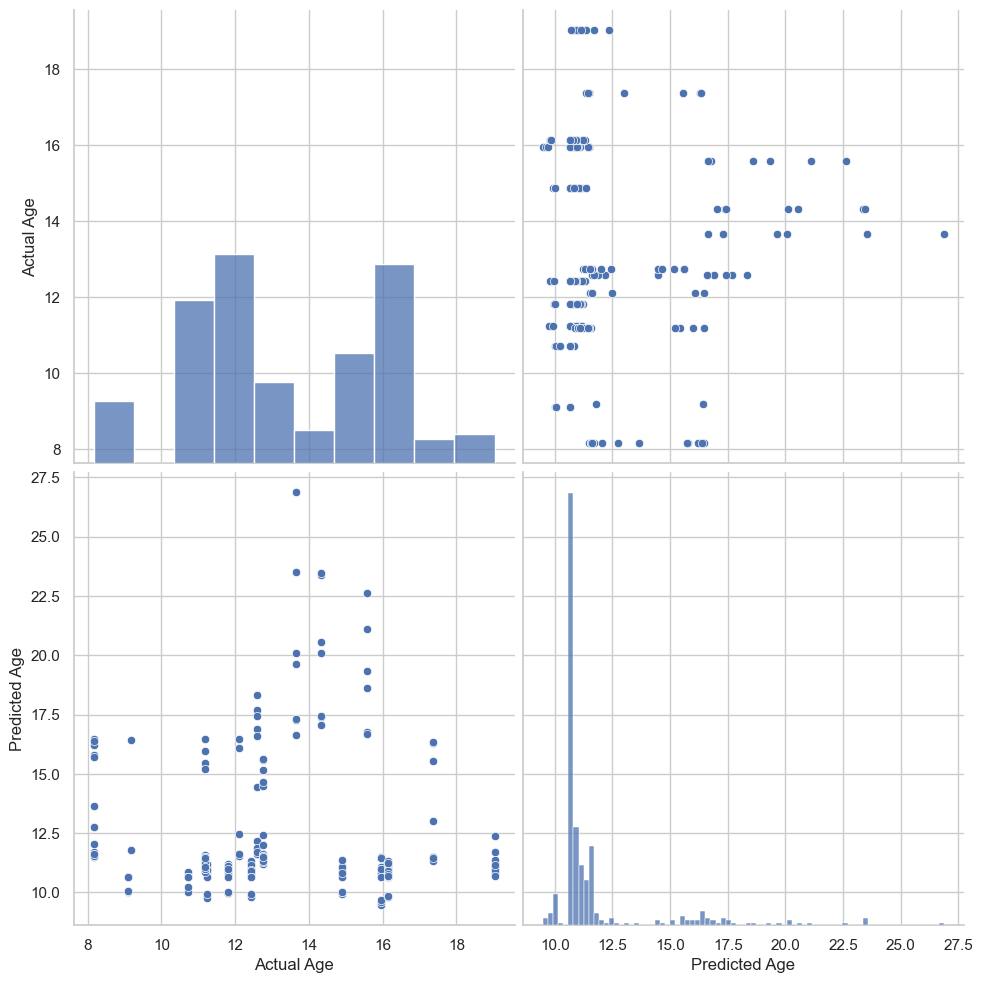

In [83]:
# Evaluate the model and calculate accuracy within tolerance
load_model = tf.keras.models.load_model("./adam_best_model_checkpoint.h5")
evaluate_model_with_accuracy(model, X_test, y_test)